In [8]:
import bluequbit
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib

In [9]:
bq = bluequbit.init("jUU2f6gHzoqgklYFv265l4K72l4qhFet")

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


In [ ]:
qc_qiskit = QuantumCircuit(4)
qc_qiskit.h(0)
qc_qiskit.h(1)
qc_qiskit.h(2)
qc_qiskit.h(3)
qc_qiskit.measure_all()

In [ ]:
result = bq.run(qc_qiskit, device="cpu", shots=100)

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: bZ9OBhMQmnpo9I7b, device: cpu, run status: COMPLETED, created on: 2025-04-11 19:43:22 UTC, cost: $0.00, run time: 9 ms, queue time: 98 ms, num qubits: 4


In [ ]:
print(result.get_counts())

{'0000': 7, '0001': 6, '0010': 3, '0011': 9, '0100': 2, '0101': 4, '0110': 9, '0111': 3, '1000': 8, '1001': 11, '1010': 6, '1011': 7, '1100': 7, '1101': 3, '1110': 8, '1111': 7}


# Same with qiskit

In [ ]:
circuit = QuantumCircuit(4)

circuit.x(0)
circuit.x(3)
circuit.barrier()

for i in range(4):
    circuit.ry(0.8 * np.pi, i)

circuit.measure_all()

In [ ]:
circuit.draw()

┌───┐ ░ ┌──────────┐ ░ ┌─┐         
   q_0: ┤ X ├─░─┤ Ry(4π/5) ├─░─┤M├─────────
        └───┘ ░ ├──────────┤ ░ └╥┘┌─┐      
   q_1: ──────░─┤ Ry(4π/5) ├─░──╫─┤M├──────
              ░ ├──────────┤ ░  ║ └╥┘┌─┐   
   q_2: ──────░─┤ Ry(4π/5) ├─░──╫──╫─┤M├───
        ┌───┐ ░ ├──────────┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ X ├─░─┤ Ry(4π/5) ├─░──╫──╫──╫─┤M├
        └───┘ ░ └──────────┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

In [ ]:
backend = Aer.get_backend("qasm_simulator")

In [ ]:
job = backend.run(circuit, shots=500)

In [ ]:
result = job.result()

In [ ]:
counts = result.get_counts(circuit)

In [ ]:
print(counts)

{'1000': 1, '1010': 3, '0101': 5, '1110': 31, '0100': 33, '1100': 3, '0001': 1, '0011': 4, '1101': 1, '1111': 5, '0111': 36, '0110': 341, '0000': 5, '0010': 31}


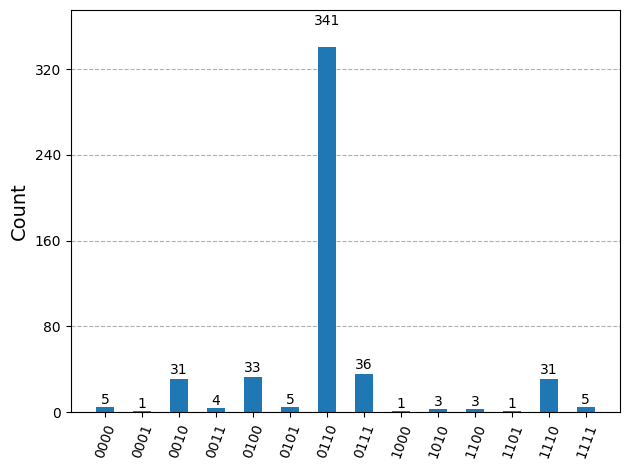

In [ ]:
plot_histogram(counts)

# QASM + Qiskit

In [1]:
from qiskit import QuantumCircuit
from qiskit import qasm, qasm2, qasm3

In [ ]:
circuit_qasm = QuantumCircuit.from_qasm_file("/Users/soardr/Downloads/YQuantum 2025/P2_swift_rise.qasm")
# circuit_qasm = QuantumCircuit.from_qasm_file("/Users/soardr/Downloads/YQuantum 2025/P3__sharp_peak.qasm")

In [4]:
circuit_qasm.measure_all()

In [10]:
result = bq.run(circuit_qasm, device="cpu", shots=100)

[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: wtTKVk6ORnh3SbmM, device: cpu, run status: RUNNING, created on: 2025-04-13 16:02:48 UTC, estimated runtime: 82500 ms, estimated cost: $0.00, num qubits: 28


In [11]:
print(result.get_counts())

{'0000001101100011011000011100': 1, '0010001001100011011000011101': 1, '0010101101100011011000011101': 2, '0010111011100011011000110101': 1, '0011111101100010000110011100': 1, '0100100101100011011000011100': 1, '0101001101100011100010011101': 1, '1000101101100010000110101011': 1, '1000101111110111011000011100': 1, '1001001101100011011000011101': 2, '1001111101100011011000011100': 1, '1010011101100011011000011100': 1, '1010101101100011011000010000': 1, '1010101101100011011000011010': 1, '1010110101100011011000011101': 1, '1011001101100011011000011100': 1, '1011010101100011011000011100': 1, '1011011001100011011000011100': 1, '1100000101100011011000011100': 1, '1100001101100000100000011101': 1, '1100010110000011011000011100': 1, '1100100010000111011000011100': 1, '1100100010011011011000011100': 1, '1100100011001111011000011100': 1, '1100100011101111011010010000': 1, '1100100111101110000110011100': 1, '1100101010001011011000011100': 1, '1100101011011111011000011100': 1, '110010101111001101